In [1]:
# ! pip install pyvirtualdisplay -q
# ! apt-get install -y xvfb >> /dev/null

from IPython.display import Image
import imageio
import os
import shutil
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import gc

import vtk
from vtkmodules.util import numpy_support
from dicom_CT import vtk_render_gif, CreateLut, CreateTissue, CreateTissueMap, vtk_show, render_lungs
import numpy
from pyvirtualdisplay import Display

## Reading data

In [2]:
## supporting lines =  tidying up
workdir='Output_ipynb/'

os.makedirs(workdir, exist_ok = True)

# datadir = "/kaggle/input/osic-pulmonary-fibrosis-progression/train/"
# patients = os.listdir(datadir)
# patients.sort()
# patient = patients[17]

# PathDicom = "../../Data/20230906_lung-data"
PathDicom = "../../Data/20240409_leg-data"

reader = vtk.vtkDICOMImageReader()
reader.SetDirectoryName(PathDicom)
reader.Update()

patient = "ID00012637202177665765362"

## Axial view:

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


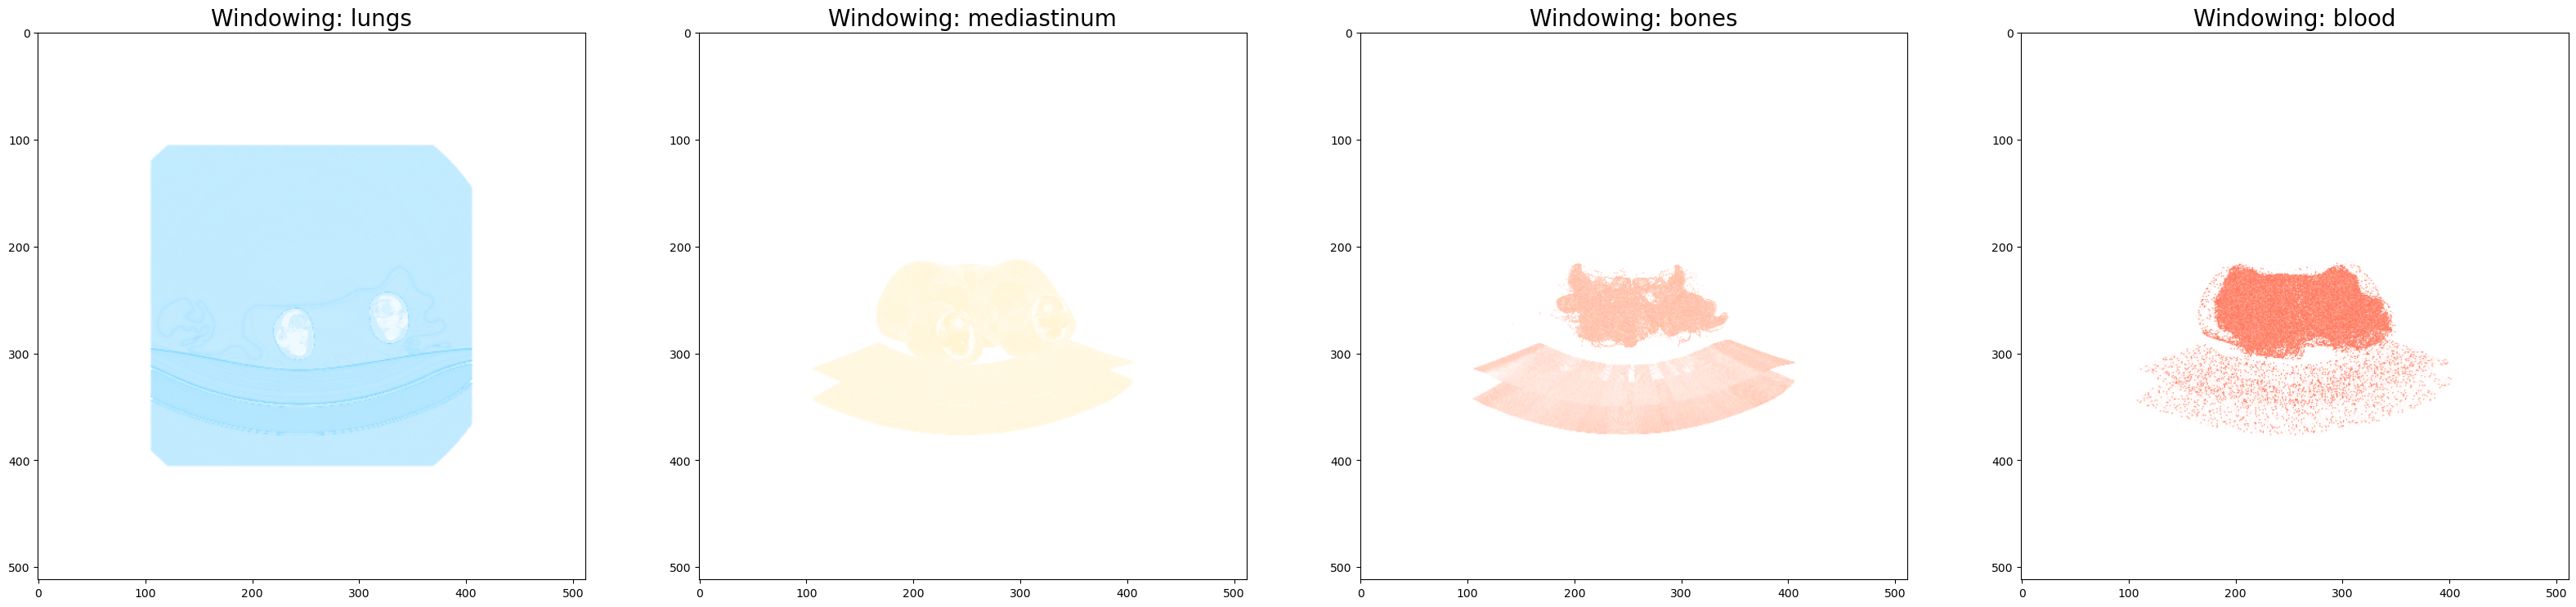

In [3]:
windowing = {}
windowing['lungs'] = [1500,-600,64,123,147]
windowing['mediastinum'] = [350,50,255,244,209]
windowing['bones'] = [300,400,177,122,101]
windowing['blood'] = [5,80,216,101,79]



imageData = reader.GetOutput()
volumeMapper = vtk.vtkSmartVolumeMapper()
volumeMapper.SetInputData(imageData)
volumeProperty = vtk.vtkVolumeProperty()
volumeProperty.SetInterpolationType(vtk.VTK_LINEAR_INTERPOLATION)

for cur_windowing in windowing:
    cur_w = windowing[cur_windowing]
    opacity_function = vtk.vtkPiecewiseFunction()
    opacity_function.AddPoint(cur_w[1]-cur_w[0]/2,   0.0)
    opacity_function.AddPoint(cur_w[1],   1.0)
    opacity_function.AddPoint(cur_w[1]+cur_w[0]/2,   0.0)
    volumeProperty.SetScalarOpacity(opacity_function)

    color_function = vtk.vtkColorTransferFunction()
    color_function.SetColorSpaceToDiverging()
    color_function.AddRGBPoint(cur_w[1]-cur_w[0]/2,0,0,0)
    color_function.AddRGBPoint(cur_w[1],cur_w[2],cur_w[3],cur_w[4])
    color_function.AddRGBPoint(cur_w[1]+cur_w[0]/2, 0,0,0)

    volumeProperty.SetColor(color_function)

    volume = vtk.vtkVolume()
    volume.SetMapper(volumeMapper)
    volume.SetProperty(volumeProperty)

    renderer = vtk.vtkRenderer();
    volumeMapper.SetRequestedRenderModeToRayCast()
    renderer.AddViewProp(volume)
    
    renderer.ResetCamera()
    renderer.SetBackground(1,1,1);
    renderer.ResetCamera()
    renderer.ResetCameraClippingRange()
    camera = renderer.MakeCamera()

    camera.SetPosition(0,0,0)
    camera = renderer.GetActiveCamera()
    camera.Dolly(1.5)


    camera.Roll(360)
    name = workdir + patient + cur_windowing + '_top'
    vtk_render_gif(renderer, N = 1 ,name =  name, standard = False)
    
    name = workdir + patient + cur_windowing + '_front'
    camera.Elevation(240)
    camera.Elevation(20)
    vtk_render_gif(renderer, N = 1 ,name =  name, standard = False)
    
    
plt.rcParams["figure.figsize"] = (40,40)
idp = 0 
for cur_windowing in windowing:
    idp += 1
    plt.subplot(len(windowing),4, idp)
    try:
        im = mpimg.imread( workdir + patient + cur_windowing+'_top.gif') 
        plt.imshow(im) 
        plt.title('Windowing: ' + cur_windowing, fontsize =20)
    except:
        pass

## Coronal view:

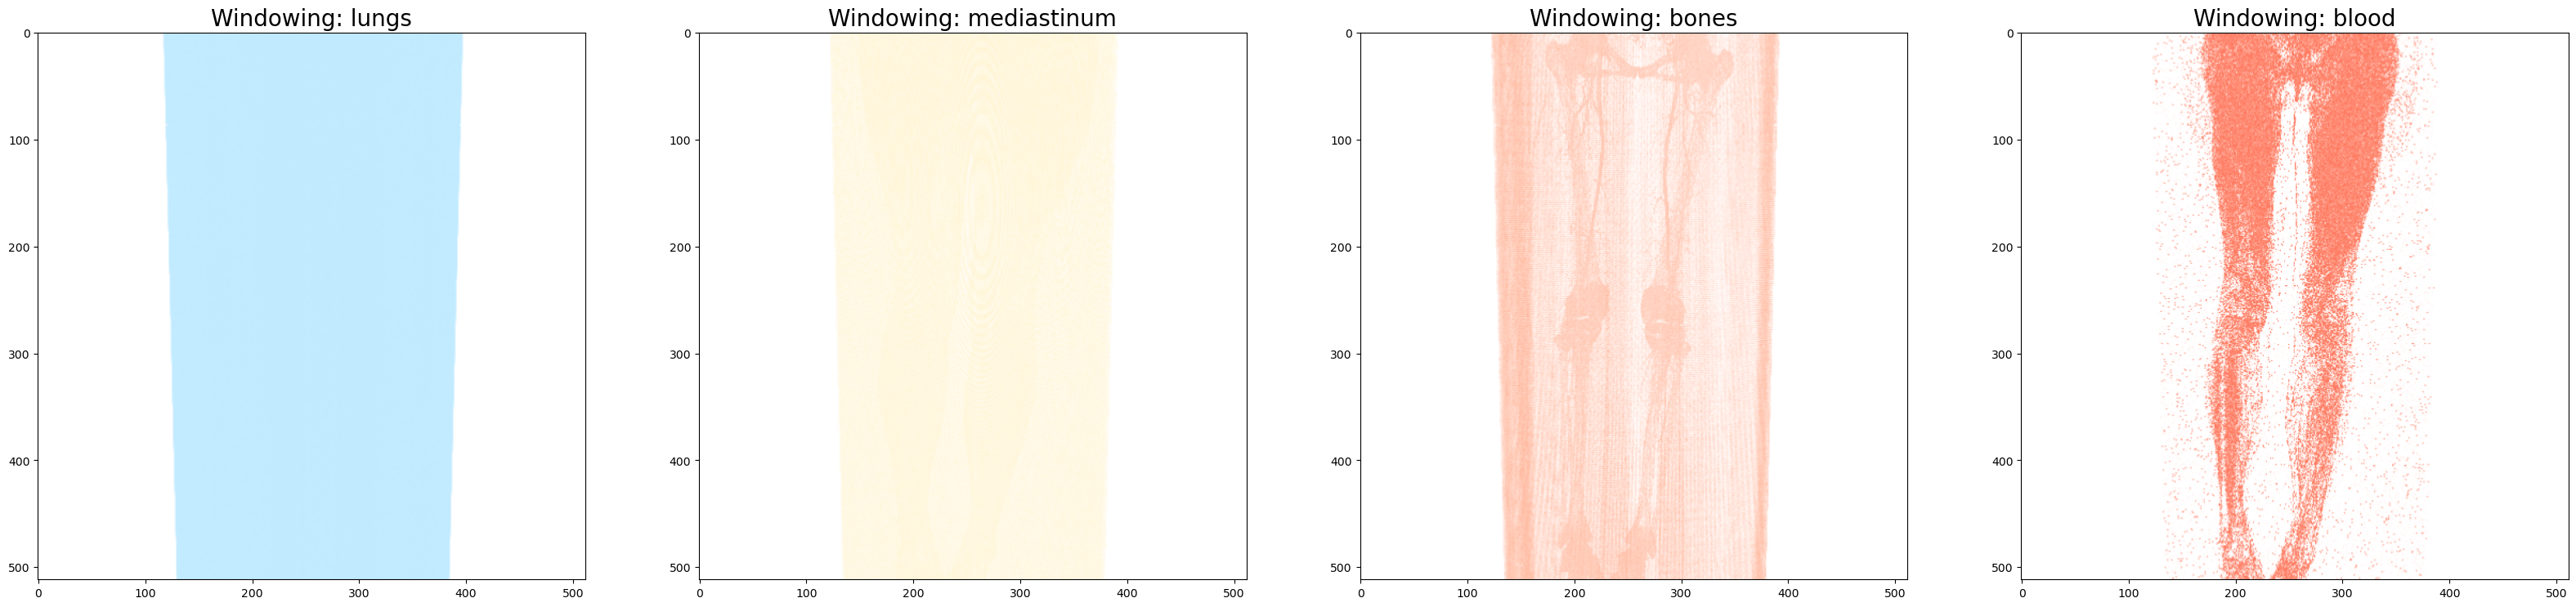

In [4]:
plt.rcParams["figure.figsize"] = (40,40)
idp = 0 
for cur_windowing in windowing:
    idp += 1
    plt.subplot(len(windowing),4, idp)
    try:
        im = mpimg.imread( workdir + patient + cur_windowing+'_front.gif') 
        plt.imshow(im) 
        plt.title('Windowing: ' + cur_windowing, fontsize =20)
    except:
        pass

## Front view (skeleton + lungs + blood)

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


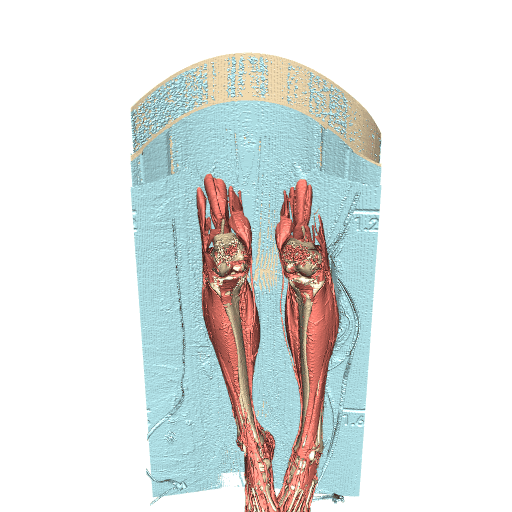

In [5]:
N =  18
default_width = 512
default_height = 512

##time

# Setup render --------------------------------------------------------------------------------------------------
renderer = vtk.vtkRenderer()
renderer.AddActor(CreateTissue(reader,-900,-400,"lung"))
renderer.AddActor(CreateTissue(reader,0,120,"blood"))
renderer.AddActor(CreateTissue(reader,100,2000,"skeleton"))
renderer.SetBackground(1.0, 1.0, 1.0)

renderer.ResetCamera()
renderer.ResetCameraClippingRange()
camera = renderer.GetActiveCamera()
camera.Elevation(120)
camera.Roll(180)
renderer.SetActiveCamera(camera)

name = workdir + patient + "_front"
vtk_render_gif(renderer, 5, name, Dolly = 1.5)

Image(filename=name + ".gif", format='png')    

## Back view (skeleton + lungs + blood)

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


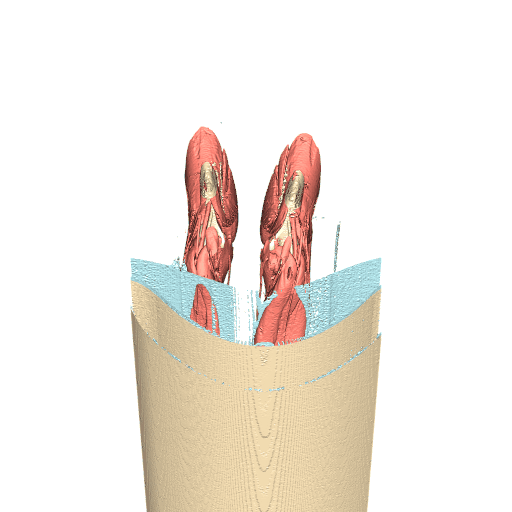

In [6]:
##time

renderer = vtk.vtkRenderer()
renderer.AddActor(CreateTissue(reader,-900,-400,"lung"))
renderer.AddActor(CreateTissue(reader,0,120,"blood"))
renderer.AddActor(CreateTissue(reader,100,2000,"skeleton"))

renderer.SetBackground(1.0, 1.0, 1.0)

renderer.ResetCamera()
renderer.ResetCameraClippingRange()
camera = renderer.GetActiveCamera()
camera.Elevation(120)
camera.Elevation(120)
# camera.Roll(180)
renderer.SetActiveCamera(camera)

name = workdir + patient + "_back"
vtk_render_gif(renderer, 1, name, Dolly = 1.5)

Image(filename=name + ".gif", format='png')    

## Lung segmentation

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


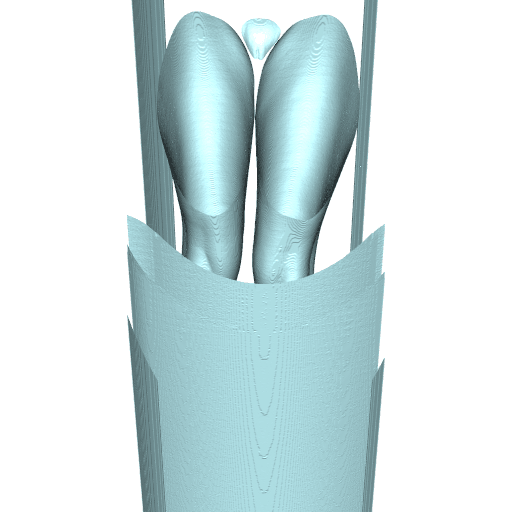

In [7]:
##time
# disp = Display().start()
renderer = vtk.vtkRenderer()
actor = CreateTissue(reader,-2000,-300,"lung", isoValue = 170)
renderer.AddActor(actor)
renderer.SetBackground(1.0, 1.0, 1.0)

renderer.ResetCamera()
renderer.ResetCameraClippingRange()
camera = renderer.GetActiveCamera()
camera.Elevation(120)
camera.Elevation(120)
renderer.SetActiveCamera(camera)

name = workdir + patient + '_lungs'

vtk_render_gif(renderer, 1, name, Dolly = 1.5)
# disp.stop()

Image(filename=name + ".gif", format='png')

In [8]:
##time
# s_patients = [patients[i] for i in [1,2,4,6,8,12,13,14,15,16]]
# for patient in s_patients:
#     try:
#         render_lungs(workdir, datadir, patient='lung_1')
#         print(patient + ' completed render lungs')
#     except:
#         print(patient + ' failed render lungs')

render_lungs(workdir, PathDicom, patient='leg_1_1900')
# try:
#     render_lungs(workdir, PathDicom, patient='leg_1')
#     print('completed render lungs')
# except:
#     print('failed render lungs')



# plt.rcParams["figure.figsize"] = (40,120)
# idp = 0 
# for patient in s_patients:
#     idp += 1
#     plt.subplot(10,2, idp)
#     try:
#         im = mpimg.imread( workdir + patient + '_lungs.gif') 
#         plt.imshow(im) 
#         plt.title('OSIC PatientID: '+patient, fontsize=20)
#     except:
#         pass

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
